# Connectivity Atlas 

This secion will serve as an intorduction to the Allen Brain Mouse Connectivity Atlas. 

In [34]:
# Import necessary Toolkits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import requests

Much like before, we will `import` the MouseConnectivityCache module. This provides us tools to get information on the mouse connectivty database. We can then create an instance of our cache.

In [35]:
#Import MouseConnectivityCache and convert it to mcc
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
mcc = MouseConnectivityCache(manifest_file='connectivity/mouse_connectivity_manifest.json')
print(mcc)

## Download experimental metadata by trangenic line

Now that we have our instance of the mouse connectivity cache, we can start downloading our experimental metadata. To do this, we will call `get_experiments()` on our connectivity instance. 

In [36]:
#Gather all the experiments with Cre and WildType
all_experiments = mcc.get_experiments(dataframe=True)
mouse_exp_df = pd.DataFrame(all_experiments)
mouse_exp_df.head()

,gender,injection_structures,injection_volume,injection_x,injection_y,injection_z,product_id,specimen_name,strain,structure_abbrev,structure_id,structure_name,transgenic_line,transgenic_line_id,id,primary_injection_structure
id,,,,,,,,,,,,,,,,
527712447,F,"[502, 926, 1084, 484682470]",0.006655,9240,3070,8990,5,Penk-IRES2-Cre-neo-249961,C57BL/6J,SUB,502,Subiculum,Penk-IRES2-Cre-neo,298725927.0,527712447,502
301875966,M,"[574, 931]",0.105746,9170,6850,6200,5,Gabrr3-Cre_KC112-3467,C57BL/6J,PG,931,Pontine gray,Gabrr3-Cre_KC112,177838877.0,301875966,574
520336173,M,"[1, 210, 491, 525, 1004]",0.025762,7810,6550,6450,5,Hdc-Cre_IM1-204103,None,TMv,1,"Tuberomammillary nucleus, ventral part",Hdc-Cre_IM1,177839494.0,520336173,1
307160976,F,[304325711],0.013590,5580,7040,6270,31,Cdh4-Cre-215,None,retina,304325711,retina,Cdh4-CreER,308603472.0,307160976,304325711
644250774,F,[329],0.006724,6990,2150,2130,36,A930038C07Rik-Tg1-Cre-347488,None,SSp-bfd,329,"Primary somatosensory area, barrel field",A930038C07Rik-Tg1-Cre,177838542.0,644250774,329


This gives us metadata on all the expereiments in the dataset. Alternatively, you can specify within the method wether you would like to filter certain experiments by `transgenic_line`. Let's take a look at what trangenic lines are availabe to us. 

In [37]:
trangenic_lines = mouse_exp_df['transgenic_line'].unique()
trangenic_lines

array(['Penk-IRES2-Cre-neo', 'Gabrr3-Cre_KC112', 'Hdc-Cre_IM1',
       'Cdh4-CreER', 'A930038C07Rik-Tg1-Cre', 'Ai75(RCL-nT)',
       'Scnn1a-Tg2-Cre', 'Etv1-CreERT2', None, 'Slc17a6-IRES-Cre',
       'Nos1-CreERT2', 'Gad2-IRES-Cre', 'Grm2-Cre_MR90',
       'Prkcd-GluCla-CFP-IRES-Cre', 'Gpr26-Cre_KO250', 'Tlx3-Cre_PL56',
       'Chrna2-Cre_OE25', 'Ins2-Cre_25', 'Syt6-Cre_KI148',
       'Calb2-IRES-Cre', 'Rbp4-Cre_KL100', 'Cux2-IRES-Cre',
       'Emx1-IRES-Cre', 'Dbh-Cre_KH212', 'Slc6a4-CreERT2_EZ13',
       'Grp-Cre_KH288', 'Slc32a1-IRES-Cre', 'Gng7-Cre_KH71',
       'Oxt-IRES-Cre', 'Ntsr1-Cre_GN220', 'Pdzk1ip1-Cre_KD31',
       'Slc17a8-IRES2-Cre', 'Grik4-Cre', 'Cart-Tg1-Cre', 'Ntrk1-IRES-Cre',
       'Chat-IRES-Cre-neo', 'Scnn1a-Tg3-Cre', 'Ppp1r17-Cre_NL146',
       'Gnrh1-Cre', 'Npr3-IRES2-Cre', 'Sim1-Cre_KJ18', 'Pvalb-IRES-Cre',
       'Hcrt-Cre', 'Cort-T2A-Cre', 'Cnnm2-Cre_KD18', 'Drd1a-Cre_EY262',
       'Calb1-T2A-dgCre', 'Syt17-Cre_NO14', 'Pcp2-Cre_GN135',
       'Drd3-Cre_KI196

In [38]:
trangenic_line_exps = pd.DataFrame(mcc.get_experiments(cre = ['Penk-IRES2-Cre-neo', 'Gabrr3-Cre_KC112', 'Hdc-Cre_IM1']))
trangenic_line_exps = trangenic_line_exps.set_index('id')

print('The Dataframe is' + ' ' + str(len(trangenic_line_exps)) + ' ' + 'entries long')
print(trangenic_line_exps['transgenic_line'].unique())

trangenic_line_exps.head()

The Dataframe is 39 entries long
['Penk-IRES2-Cre-neo' 'Gabrr3-Cre_KC112' 'Hdc-Cre_IM1']


,gender,injection_structures,injection_volume,injection_x,injection_y,injection_z,product_id,specimen_name,strain,structure_abbrev,structure_id,structure_name,transgenic_line,transgenic_line_id,primary_injection_structure
id,,,,,,,,,,,,,,,
527712447,F,"[502, 926, 1084, 484682470]",0.006655,9240,3070,8990,5,Penk-IRES2-Cre-neo-249961,C57BL/6J,SUB,502,Subiculum,Penk-IRES2-Cre-neo,298725927,502
301875966,M,"[574, 931]",0.105746,9170,6850,6200,5,Gabrr3-Cre_KC112-3467,C57BL/6J,PG,931,Pontine gray,Gabrr3-Cre_KC112,177838877,574
520336173,M,"[1, 210, 491, 525, 1004]",0.025762,7810,6550,6450,5,Hdc-Cre_IM1-204103,None,TMv,1,"Tuberomammillary nucleus, ventral part",Hdc-Cre_IM1,177839494,1
602828622,F,[993],0.014113,2510,2440,3850,45,Penk-IRES2-Cre-neo-321021,None,MOs,993,Secondary motor area,Penk-IRES2-Cre-neo,298725927,993
168664192,F,"[91, 217, 372, 867, 920, 928, 589508455]",0.062617,10890,3280,7430,5,Gabrr3-Cre-123,None,IP,91,Interposed nucleus,Gabrr3-Cre_KC112,177838877,91


## Download experimental metadata by injection structure 

MouseConnectivityCache has a method for retrieving the adult mouse structure tree as an StructureTree class instance. This is done by executing the `get_structure_tree()` method on your MouseConnectivityCache instance (`mcc`). The StructureTree class has many methods that allows you to access lists of brain structures through their ID, name, acronym, and many other properties. Below we will access information on the hypothalamus via its name by calling `get_structures_by_name` on our StructureTree instance. 

In [39]:
# grab the StructureTree instance
structure_tree = mcc.get_structure_tree()

# get info on isocortex by its name 
hypothalamus = structure_tree.get_structures_by_name(['Hypothalamus'])[0]
hypothalamus

{'acronym': 'HY',
 'graph_id': 1,
 'graph_order': 715,
 'id': 1097,
 'name': 'Hypothalamus',
 'structure_id_path': [997, 8, 343, 1129, 1097],
 'structure_set_ids': [2,
  112905828,
  691663206,
  12,
  184527634,
  112905813,
  687527670,
  114512891,
  114512892],
 'rgb_triplet': [230, 68, 56]}

This gives us a dictionary with metadata about our brain structure of interest. For more inofrmation on the different methods to access information on brain structures, click <a href="https://alleninstitute.github.io/AllenSDK/allensdk.core.structure_tree.html">here</a>. 

What about the rest of the brain structures? How do we find what brain structures are availabe to us? To do so, we can take a look at the unique values under the `name` column, in our summary of brain structures.

In [40]:
summary_structures = structure_tree.get_structures_by_set_id([167587189])
summary_structures_df = pd.DataFrame(summary_structures)
structure_name = summary_structures_df['name'].unique()
structure_name

array(['Frontal pole, cerebral cortex', 'Primary motor area',
       'Secondary motor area', 'Primary somatosensory area, nose',
       'Primary somatosensory area, barrel field',
       'Primary somatosensory area, lower limb',
       'Primary somatosensory area, mouth',
       'Primary somatosensory area, upper limb',
       'Primary somatosensory area, trunk',
       'Primary somatosensory area, unassigned',
       'Supplemental somatosensory area', 'Gustatory areas',
       'Visceral area', 'Dorsal auditory area', 'Primary auditory area',
       'Posterior auditory area', 'Ventral auditory area',
       'Anterolateral visual area', 'Anteromedial visual area',
       'Lateral visual area', 'Primary visual area',
       'Posterolateral visual area', 'posteromedial visual area',
       'Laterointermediate area', 'Postrhinal area',
       'Anterior cingulate area, dorsal part',
       'Anterior cingulate area, ventral part', 'Prelimbic area',
       'Infralimbic area', 'Orbital area, l

As a convenience, structures are grouped in to named collections called "structure sets". These sets can be used to quickly gather a useful subset of structures from the tree. The criteria used to define structure sets are eclectic; a structure set might list:

- structures that were used in a particular project.
- structures that coarsely partition the brain.
- structures that bear functional similarity.

To see only structure sets relevant to the adult mouse brain, use the StructureTree:

In [41]:
from allensdk.api.queries.ontologies_api import OntologiesApi

oapi = OntologiesApi()

# get the ids of all the structure sets in the tree
structure_set_ids = structure_tree.get_structure_sets()

# query the API for information on those structure sets
pd.DataFrame(oapi.get_structure_sets(structure_set_ids))

,description,id,name
0,List of structures in Isocortex layer 5,667481446,Isocortex layer 5
1,List of structures in Isocortex layer 6b,667481450,Isocortex layer 6b
2,Summary structures of the cerebellum,688152368,Cerebellum
3,List of structures for ABA Differential Search,12,ABA - Differential Search
4,List of valid structures for projection target...,184527634,Mouse Connectivity - Target Search
5,Structures whose surfaces are represented by a...,691663206,Mouse Brain - Has Surface Mesh
6,Summary structures of the midbrain,688152365,Midbrain
7,Summary structures of the medulla,688152367,Medulla
8,Summary structures of the striatum,688152361,Striatum
9,Structures representing subdivisions of the mo...,687527945,Mouse Connectivity - Summary


In [42]:
# From the above table, "Mouse Connectivity - Summary" has id 687527945
summary_connectivity = structure_tree.get_structures_by_set_id([687527945])
summary_connectivity_df = pd.DataFrame(summary_connectivity)
summary_connectivity_df.head()

,acronym,graph_id,graph_order,id,name,structure_id_path,structure_set_ids,rgb_triplet
0,FRP,1,6,184,"Frontal pole, cerebral cortex","[997, 8, 567, 688, 695, 315, 184]","[3, 112905828, 688152357, 691663206, 687527945...","[38, 143, 69]"
1,MOp,1,18,985,Primary motor area,"[997, 8, 567, 688, 695, 315, 500, 985]","[112905828, 688152357, 691663206, 687527945, 1...","[31, 157, 90]"
2,MOs,1,24,993,Secondary motor area,"[997, 8, 567, 688, 695, 315, 500, 993]","[112905828, 688152357, 691663206, 687527945, 1...","[31, 157, 90]"
3,SSp-n,1,44,353,"Primary somatosensory area, nose","[997, 8, 567, 688, 695, 315, 453, 322, 353]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"
4,SSp-bfd,1,51,329,"Primary somatosensory area, barrel field","[997, 8, 567, 688, 695, 315, 453, 322, 329]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"


We could also filter out the experiments by the `injection_structure`. If the ID of the injection structure is already known, one can simply input the ID number to filter out the experiments as so:

In [43]:
# filter experiments that only contain data on the primary motor area
MOp_df = pd.DataFrame(mcc.get_experiments(injection_structure_ids = [985])).set_index('id')
MOp_df.head()

,gender,injection_structures,injection_volume,injection_x,injection_y,injection_z,product_id,specimen_name,strain,structure_abbrev,structure_id,structure_name,transgenic_line,transgenic_line_id,primary_injection_structure
id,,,,,,,,,,,,,,,
272697944,M,"[985, 993]",0.371044,3940,3410,7780,5,378-1862,C57BL/6J,MOp,985,Primary motor area,None,NaN,985
180720175,M,"[337, 361, 894, 985, 993]",1.015068,5760,820,6460,5,378-1823,C57BL/6J,MOp,985,Primary motor area,None,NaN,337
100141563,M,"[337, 985]",0.172596,5370,1590,7490,5,378-697,C57BL/6J,MOp,985,Primary motor area,None,NaN,337
288169135,M,"[985, 993]",0.316101,4200,1670,7070,5,Efr3a-Cre_NO108-84,FVB.CD1(ICR),MOp,985,Primary motor area,Efr3a-Cre_NO108,182761781.0,985
127084296,M,[985],0.344318,5160,2270,6980,5,378-1401,C57BL/6J,MOp,985,Primary motor area,None,NaN,985


But what if we do not know the structure ID? That is not a hard probelm to fix. Like we did earlier, we can access a dictionary of metadata for our structure of interest using our StructureTree helper methods. 

In [44]:
VTA = structure_tree.get_structures_by_name(['Ventral tegmental area'])[0]
VTA_df = pd.DataFrame(mcc.get_experiments(injection_structure_ids = [VTA['id']]))
VTA_df.head()

,gender,injection_structures,injection_volume,injection_x,injection_y,injection_z,product_id,specimen_name,strain,structure_abbrev,structure_id,structure_name,transgenic_line,transgenic_line_id,id,primary_injection_structure
0,M,"[12, 100, 128, 214, 749, 795, 886, 946]",0.778492,8160,5040,5690,5,Erbb4-2A-CreERT2-D-5682,C57BL/6J,VTA,749,Ventral tegmental area,Erbb4-T2A-CreERT2,177838266.0,127867804,12
1,F,"[12, 128, 246, 591, 749]",0.252069,8630,5090,5930,5,Cck-IRES-Cre-91,None,VTA,749,Ventral tegmental area,Cck-IRES-Cre,177839159.0,171021829,12
2,F,"[128, 214, 749, 795]",0.010615,8410,4830,6180,5,Th-Cre_FI172-135967,B6.FVB,VTA,749,Ventral tegmental area,Th-Cre_FI172,177837797.0,304337288,128
3,M,"[58, 128, 246, 374, 381, 749]",0.164738,8560,5140,6770,5,Slc18a2-Cre_OZ14-3970,None,VTA,749,Ventral tegmental area,Slc18a2-Cre_OZ14,177837324.0,292958638,58
4,M,"[12, 100, 128, 197, 749, 795, 946, 607344830]",0.060049,8280,5220,5940,5,378-1474,C57BL/6J,VTA,749,Ventral tegmental area,None,NaN,127796728,12


## Putting it All Together 

Below is an example of how we can combine both filtering by Cre line and by injection structure to get a more refined set of data.

In [45]:
# select cortical experiments 
isocortex = structure_tree.get_structures_by_name(['Isocortex'])[0]

# same as before, but restrict the cre line
rbp4_cortical_experiments = mcc.get_experiments(cre=[ 'Rbp4-Cre_KL100' ], 
                                                injection_structure_ids=[isocortex['id']])

# convert to a dataframe 
rbp4_cortical_df = pd.DataFrame(rbp4_cortical_experiments).set_index('id')
rbp4_cortical_df.head()

,gender,injection_structures,injection_volume,injection_x,injection_y,injection_z,product_id,specimen_name,strain,structure_abbrev,structure_id,structure_name,transgenic_line,transgenic_line_id,primary_injection_structure
id,,,,,,,,,,,,,,,
249402048,M,"[104, 345, 378, 1057]",0.321212,4410,4110,9390,5,Rbp4-Cre_KL100-217,C57BL/6J,GU,1057,Gustatory areas,Rbp4-Cre_KL100,177838435,104
523718823,M,"[385, 533, 879, 886, 894]",0.075229,8680,1050,4050,36,Rbp4-Cre_KL100-245457,None,VISpm,533,posteromedial visual area,Rbp4-Cre_KL100,177838435,385
294481346,F,"[385, 533]",0.129882,8650,710,7560,5,Rbp4-Cre_KL100-125732,None,VISpm,533,posteromedial visual area,Rbp4-Cre_KL100,177838435,385
657046319,M,"[385, 879, 894]",0.020779,9600,1260,3800,35,Rbp4-Cre_KL100-363600,None,VISp,385,Primary visual area,Rbp4-Cre_KL100,177838435,385
166153483,M,"[104, 119, 583, 985]",0.415792,3530,4540,8340,5,Rbp4-Cre-103,None,AIv,119,"Agranular insular area, ventral part",Rbp4-Cre_KL100,177838435,104


## Download and visualize gridded projection signal volumes (raw data)

The ProjectionStructureUnionizes API data tells you how much signal there was in a given structure and experiment. It contains the density of projecting signal, volume of projecting signal, and other information. MouseConnectivityCache provides methods for querying and storing this data. To access to this signal projection data, you must call the `get_structure_unionizes()` method on our MouseConnectivityCache instance.

For more information on the outputs of `get_structure_unionizes()` please visit <a href="https://alleninstitute.github.io/AllenSDK/unionizes.html">here</a>. For documentation on `get_structure_unionizes()` and other MouseConnectivityCache helper methods, please click <a href="https://alleninstitute.github.io/AllenSDK/allensdk.core.mouse_connectivity_cache.html">here</a>

In [46]:
# find wild-type injections into primary motor cortex 
VISp = structure_tree.get_structures_by_name(['Primary visual area'])[0]
VISp_experiments = mcc.get_experiments(cre=False, 
                                       injection_structure_ids=[VISp['id']])
print("%d Primary visual area experiments" % len(VISp_experiments))


structure_unionizes = mcc.get_structure_unionizes(experiment_ids = [exp['id'] for exp in 
                                                    VISp_experiments], 
                                                  is_injection=False,
                                                  structure_ids=[isocortex['id']],
                                                  include_descendants=True)

print("%d Primary visual area non-injection, cortical structure unionizes" % len(structure_unionizes))

33 Primary visual area experiments
29204 Primary visual area non-injection, cortical structure unionizes


In [47]:
structure_unionizes.head()

,experiment_id,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
0,307297141,3,636132051,False,0.135948,5700,680,7490,0.000045,0.000090,0.011458,126.726430,0.000030,1030,5.779040e+10,269614784.0,3.089182e+06,2.437678e+04,0.330278
1,307297141,2,636125427,False,0.239197,4670,1090,6950,0.000218,0.000198,0.057760,292.118347,0.000145,320,1.609707e+11,598041920.0,3.454268e+07,1.182489e+05,0.732601
2,307297141,1,636130167,False,1.000000,9210,1990,2790,0.028052,0.205331,319.533539,1556.188721,0.018616,305,4.455195e+10,74012400.0,2.364944e+10,1.519703e+07,0.090665
3,307297141,1,636130887,False,0.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2,6.701981e+09,51414300.0,0.000000e+00,0.000000e+00,0.062983
4,307297141,1,636128375,False,0.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1010,2.252017e+10,81598496.0,0.000000e+00,0.000000e+00,0.099958


This is a very large dataframe filled with all the signal projection data for our experiments of interest. We can filter this like any other dataframe. For example, filter the dataframe to only include experiments with a large projection density and volume. For the purposes of this lesson, we will consider any `projection_density` and `volume` greater than 0.5 to be *large*. 

In [48]:
# Only include experiments that have a large projection density 
dense_unionizes = structure_unionizes[structure_unionizes['projection_density'] > .5 ]

# Only include experiments from the dense dataframe that have a large volume 
large_unionizes = dense_unionizes[dense_unionizes['volume'] > .5 ]

# create a dataframe that contains metadata from structure IDs within our large and dense df
large_structures = pd.DataFrame(structure_tree.nodes(large_unionizes['structure_id']))

print("%d large, dense, cortical, non-injection unionizes, %d structures" % ( len(large_unionizes), len(large_structures) ))

# return all large, dense, cortical, structure unionizes 
print(large_structures['name'])

large_unionizes

18 large, dense, cortical, non-injection unionizes, 18 structures
0               Lateral visual area
1         Rostrolateral visual area
2                   Postrhinal area
3                      Visual areas
4               Lateral visual area
5     Primary visual area, layer 6a
6               Lateral visual area
7               Primary visual area
8               Lateral visual area
9               Lateral visual area
10              Lateral visual area
11              Lateral visual area
12              Lateral visual area
13                  Postrhinal area
14              Lateral visual area
15     Primary visual area, layer 1
16              Primary visual area
17        Rostrolateral visual area
Name: name, dtype: object


,experiment_id,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
229,307297141,2,636125869,False,1.0,9650,1820,9220,0.582058,0.598548,1902.673072,3178.812192,0.386275,409,1.172856e+12,5.268182e+08,1.002363e+12,3.153262e+08,0.645352
1538,113887162,2,633272766,False,1.0,7830,1500,8340,0.836458,0.627888,1960.408377,3122.223785,0.341144,417,9.620248e+11,4.435262e+08,8.694925e+11,2.784850e+08,0.543320
1841,180296424,2,630240820,False,1.0,9310,3180,9690,0.626614,0.744479,4059.921430,5453.373345,0.510067,312782628,2.350927e+12,5.592923e+08,2.270683e+12,4.163813e+08,0.685133
2306,180296424,2,630239708,False,1.0,9170,2300,9690,4.241160,0.522139,2128.869392,4077.206061,3.452329,669,1.279820e+13,5.397464e+09,1.149050e+13,2.818228e+09,6.611893
2476,180296424,3,630241279,False,1.0,9440,2350,2440,0.712232,0.532626,2363.397654,4437.253859,0.579761,409,2.262464e+12,8.885676e+08,2.100039e+12,4.732744e+08,1.088495
2548,180296424,2,630239270,False,1.0,9200,1740,8390,0.411229,0.636154,2327.454346,3658.632568,0.334743,33,1.103850e+12,4.295492e+08,9.997563e+11,2.732596e+08,0.526198
3668,307321674,2,636166751,False,1.0,9590,2050,9530,0.619244,0.817509,4431.448065,5420.674606,0.498723,409,2.314397e+12,4.980019e+08,2.206870e+12,4.071209e+08,0.610052
5856,307558646,2,636151215,False,1.0,9500,1260,8460,1.379541,0.508111,2117.836336,4168.060426,1.460212,385,5.716203e+12,2.345965e+09,4.968369e+12,1.192010e+09,2.873807
6054,307558646,2,636151229,False,1.0,8720,1520,9270,0.375017,0.593851,2496.282540,4203.549890,0.396947,409,1.524682e+12,5.456559e+08,1.362111e+12,3.240383e+08,0.668428
6931,307320960,2,636132495,False,1.0,9330,1630,9420,0.658085,0.500901,1653.509511,3301.070831,0.338421,409,1.054259e+12,5.515297e+08,9.119596e+11,2.762617e+08,0.675624


## Build a structure-to-structure matrix of projection signal values

The MouseConnectivityCache class provides a helper method for converting ProjectionStructureUnionize data for a set of experiments and structures into a matrix. This is done by calling `get_projection_matrix` on our MouseConnectivityCache instance. The method can take in arguements `experiment_ids`, `projection_structure_ids`, `hemisphere_ids`, `parameter`, and `dataframe` to further specify your matrix.

The code below demonstrates how to make a matrix of projection density values in auditory sub-structures for cre-negative VISp experiments.

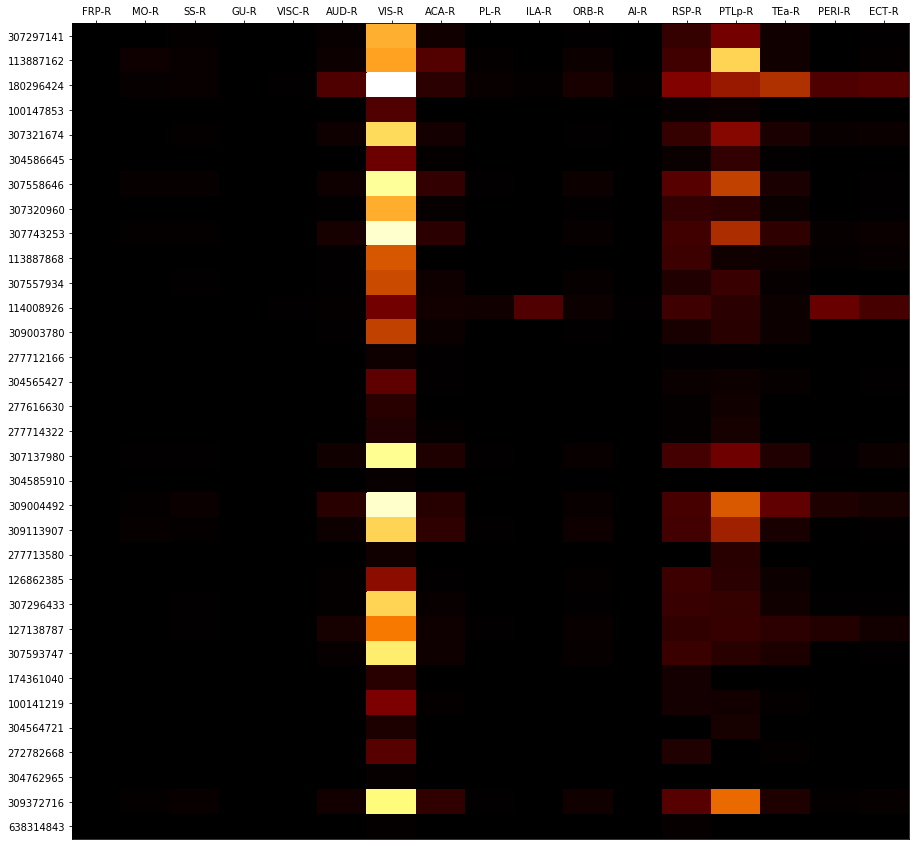

In [49]:
# collect all experiment IDs from primary visual area experiments 
visp_experiment_ids = [ exp['id'] for exp in VISp_experiments ]

ctx_children = structure_tree.child_ids( [isocortex['id']] )[0]

# create your projection matrix 
pm = mcc.get_projection_matrix(experiment_ids = visp_experiment_ids, 
                               projection_structure_ids = ctx_children,
                               hemisphere_ids= [2], # right hemisphere, ipsilateral
                               parameter = 'projection_density')


row_labels = pm['rows'] # these are just experiment ids
column_labels = [ col['label'] for col in pm['columns'] ] 
matrix = pm['matrix']

# plot your matrix 
fig, ax = plt.subplots(figsize=(15,15))
heatmap = ax.pcolor(matrix, cmap=plt.cm.afmhot)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(matrix.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(matrix.shape[0])+0.5, minor=False)

ax.set_xlim([0, matrix.shape[1]])
ax.set_ylim([0, matrix.shape[0]])          

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
plt.show()

Using another feature of the MouseConnectivityCache, w can show an example of what an image of  fluorescence would look like. The code below demonstrates how you can load the projection density for a particular experiment.

In [57]:
# a VTA experiment w/ Cre line Erbb4-T2A-CreERT2
experiment_id = 127867804

In [59]:
# projection density: number of projecting pixels / voxel volume
pd, pd_info = mcc.get_projection_density(experiment_id)

In [61]:
# Injection density: number of projecting pixels in injection site / voxel volume
ind, ind_info = mcc.get_injection_density(experiment_id)

In [65]:
# Data mask:
# Binary mask indicating which voxels contain valid data
dm, dm_info = mcc.get_data_mask(experiment_id)

In [66]:
template, template_info = mcc.get_template_volume()


In [67]:
annot, annot_info = mcc.get_annotation_volume()

In [69]:
# In addition to the annotation volume, you can get binary masks for individual structures
# this is a binary mask for the VTA
VTA_mask, cm_info = mcc.get_structure_mask(314)

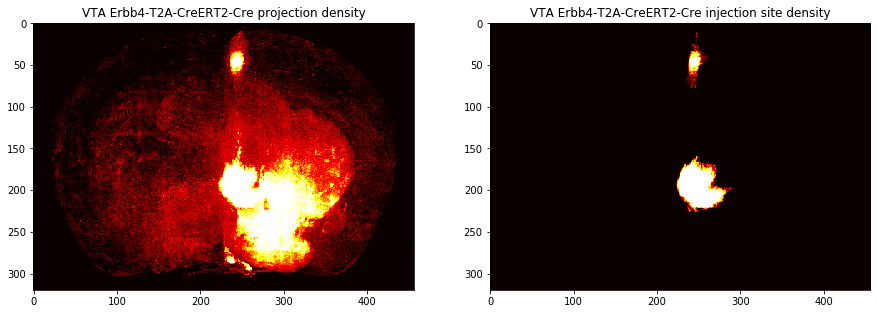

In [70]:
#Compute the maximum intensity projection of the projection data
pd_mip = pd.max(axis=0)
ind_mip = ind.max(axis=0)

#Show that slice of all volumes side-by-side
f, pr_axes = plt.subplots(1, 2, figsize=(15, 6))

pr_axes[0].imshow(pd_mip, cmap='hot', aspect='equal')
pr_axes[0].set_title("VTA Erbb4-T2A-CreERT2-Cre projection density")

pr_axes[1].imshow(ind_mip, cmap='hot', aspect='equal')
pr_axes[1].set_title("VTA Erbb4-T2A-CreERT2-Cre injection site density")

plt.show()